# Neural Network 

# Initial imports


In [15]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read in data

In [3]:
df = pd.read_csv(Path('../Resources/normalize_arbi_data.csv'))
df.head()

,hour_of_day,volume,buy_price,total_purchase_amount,sell_price,total_sale_amount,profit,spread_percentage,wallet_balance,price_difference,...,buy_exchange_Binanceus,buy_exchange_Bitstamp,buy_exchange_Gemini,buy_exchange_Kraken,buy_exchange_Poloniex,sell_exchange_Binanceus,sell_exchange_Bitstamp,sell_exchange_Gemini,sell_exchange_Kraken,sell_exchange_Poloniex
0,23,0.008658,69300.0000,600.000000,69474.95000,601.514719,1.514719,0.252453,2400.000000,174.95000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,23,989.184242,0.9103,900.454416,0.91553,905.627849,5.173434,0.574536,2101.060303,0.00523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23,2.512527,179.1930,450.227208,179.66000,451.400558,1.173350,0.260613,1650.833095,0.46700,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23,2.517840,179.1930,451.179225,179.66000,452.355056,1.175831,0.260613,2556.682277,0.46700,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,23,2.520005,179.1090,451.355600,179.66000,452.744123,1.388523,0.307634,2557.681733,0.55100,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Create the features (X) and target (y) sets

In [4]:
X = df.drop(columns=['is_profitable'])
y = df['is_profitable']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_profitable, dtype: int64

# Create training and testing datasets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Scale the data

In [6]:
#Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model

In [8]:
# Define the model - deep neural net with three hidden layers
number_input_features = len(X.iloc[0])
number_of_outputs = 1
hidden_nodes_layer1 = (number_input_features + number_of_outputs)//2
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_of_outputs)//2
hidden_nodes_layer3 = (hidden_nodes_layer2 + number_of_outputs)//2

# Create a sequential neural network model
nn_1 = Sequential()

# Add the first hidden layer
nn_1.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_1.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
nn_1.add(Dense(units=hidden_nodes_layer3, activation="relu"))


# Add the output layer
nn_1.add(Dense(units=number_of_outputs, activation="sigmoid"))


# Compile model

In [9]:
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model

In [10]:
deep_net_model_1 = nn_1.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
430/430 [==============================] - 3s 4ms/step - loss: 0.0997 - accuracy: 0.9778
Epoch 2/50
430/430 [==============================] - 1s 3ms/step - loss: 0.0082 - accuracy: 0.9979
Epoch 3/50
430/430 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 4/50
430/430 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 5/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9991
Epoch 6/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 7/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9993
Epoch 8/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9991
Epoch 9/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 10/50
430/430 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.9994

# Plot the loss function

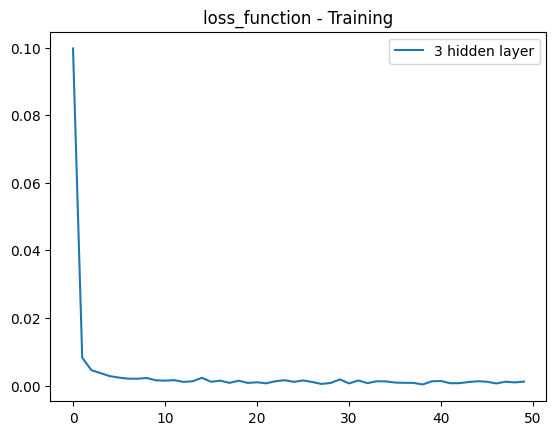

In [12]:
plt.plot(deep_net_model_1.history["loss"])
plt.title("loss_function - Training")
plt.legend(["3 hidden layer"])
plt.show()

# Evaluate the model

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

144/144 - 1s - loss: 0.0014 - accuracy: 0.9996 - 1s/epoch - 9ms/step
Loss: 0.0013666703598573804, Accuracy: 0.9995632171630859


# Save model

In [11]:
#Create file path
file_path = Path('../Resources/nn_1.weights.h5')

# Export model as a HDF5 file
nn_1.save_weights(file_path)